## Exemplo prático

Na parte teórica, entendemos a matemática e a intuição por trás da Regressão Logística. Neste exercício, vamos aplicar todo esse conhecimento em um problema real: **classificar um tumor como benigno ou maligno** com base em suas características.

Vamos seguir um fluxo de trabalho de Machine Learning passo a passo, desde a exploração dos dados até a avaliação do nosso modelo. Preparado(a)?

### Passo 1: Preparação do Ambiente e Carregamento dos Dados"

Primeiro, vamos importar as bibliotecas que nos ajudarão nessa jornada e carregar nosso conjunto de dados sobre câncer de mama.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
# Carregando os dados de um arquivo CSV para um DataFrame do Pandas
df = pd.read_csv('breast_cancer.csv')

# Vendo as 5 primeiras linhas do nosso Dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Passo 2: Análise Exploratória e Limpeza dos Dados (EDA)

Esta é uma das etapas mais importantes! Precisamos entender nossos dados, verificar se há inconsistências, valores faltantes e prepará-los para o modelo.

#### 2.1 - Limpeza Inicial

Vamos começar removendo colunas que não são úteis para o nosso modelo.

In [3]:
# A coluna id é um valor arbitrário que apenas identifique o registro, para nossa análise podemos retirar.
# Além dela temos a coluna 'Unnamed: 32' que está totalmente vazia
df = df.drop(columns=['id','Unnamed: 32'])

#### 2.2 - Verificando Dados Faltantes

Modelos de Machine Learning geralmente não sabem lidar com dados faltantes (nulos). Vamos verificar se nosso conjunto de dados está completo.

In [6]:
# .isnull().sum() conta a quantidade de valores nulos em cada coluna.
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

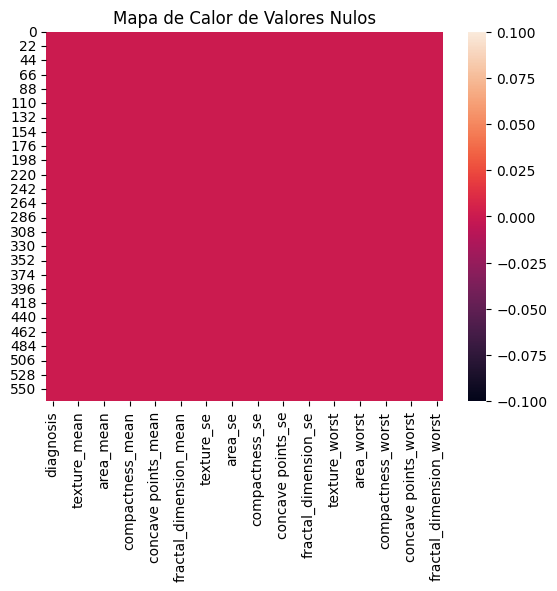

In [7]:
sns.heatmap(df.isnull())
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

#### 2.3 - Transformando a Variável Alvo (Target)

Nossa variável alvo, `diagnosis`, está como texto ('M' para Maligno, 'B' para Benigno). Os modelos de Machine Learning precisam de números para trabalhar. Vamos convertê-la da seguinte forma 
- **Maligno (M) -> 1** (considerado a classe positiva)
- **Benigno (B) -> 0**"

In [8]:
df.diagnosis = df.diagnosis.map({'M': 1, 'B':0})

In [9]:
# Verificando se a transformação deu certo
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 2.4 - Analisando a Distribuição da Variável Alvo

É importante saber se as nossas classes estão balanceadas. Ou seja, se temos uma quantidade parecida de exemplos para \"Benigno\" e \"Maligno"\.

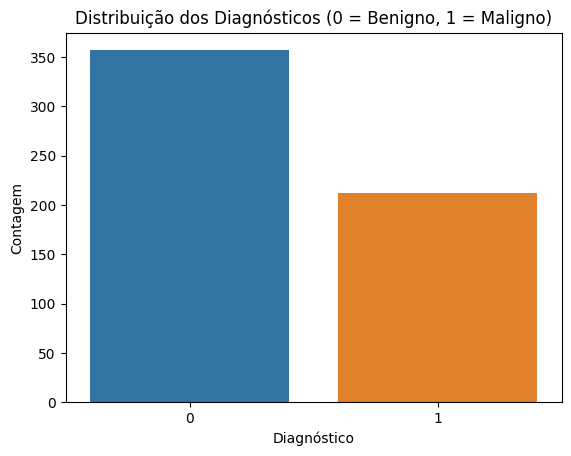

In [10]:
sns.countplot(x='diagnosis', data=df, hue='diagnosis', legend=False)
plt.title('Distribuição dos Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.show()

Temos mais casos benignos do que malignos, mas a proporção não é tão desigual a ponto de ser um grande problema para este exercício.

#### 2.5 - Correlação entre as Variáveis

Vamos ver como as outras variáveis (características do tumor) se relacionam com o diagnóstico. Uma correlação próxima de 1 (ou -1) indica uma forte relação.


In [11]:
# Calculando a matriz de correlação
corr = df.corr()
corr['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

Como podemos ver, características como `concave_points_worst`, `perimeter_worst`, `concave_points_mean` têm uma correlação muito alta com o diagnóstico, o que é um bom sinal!

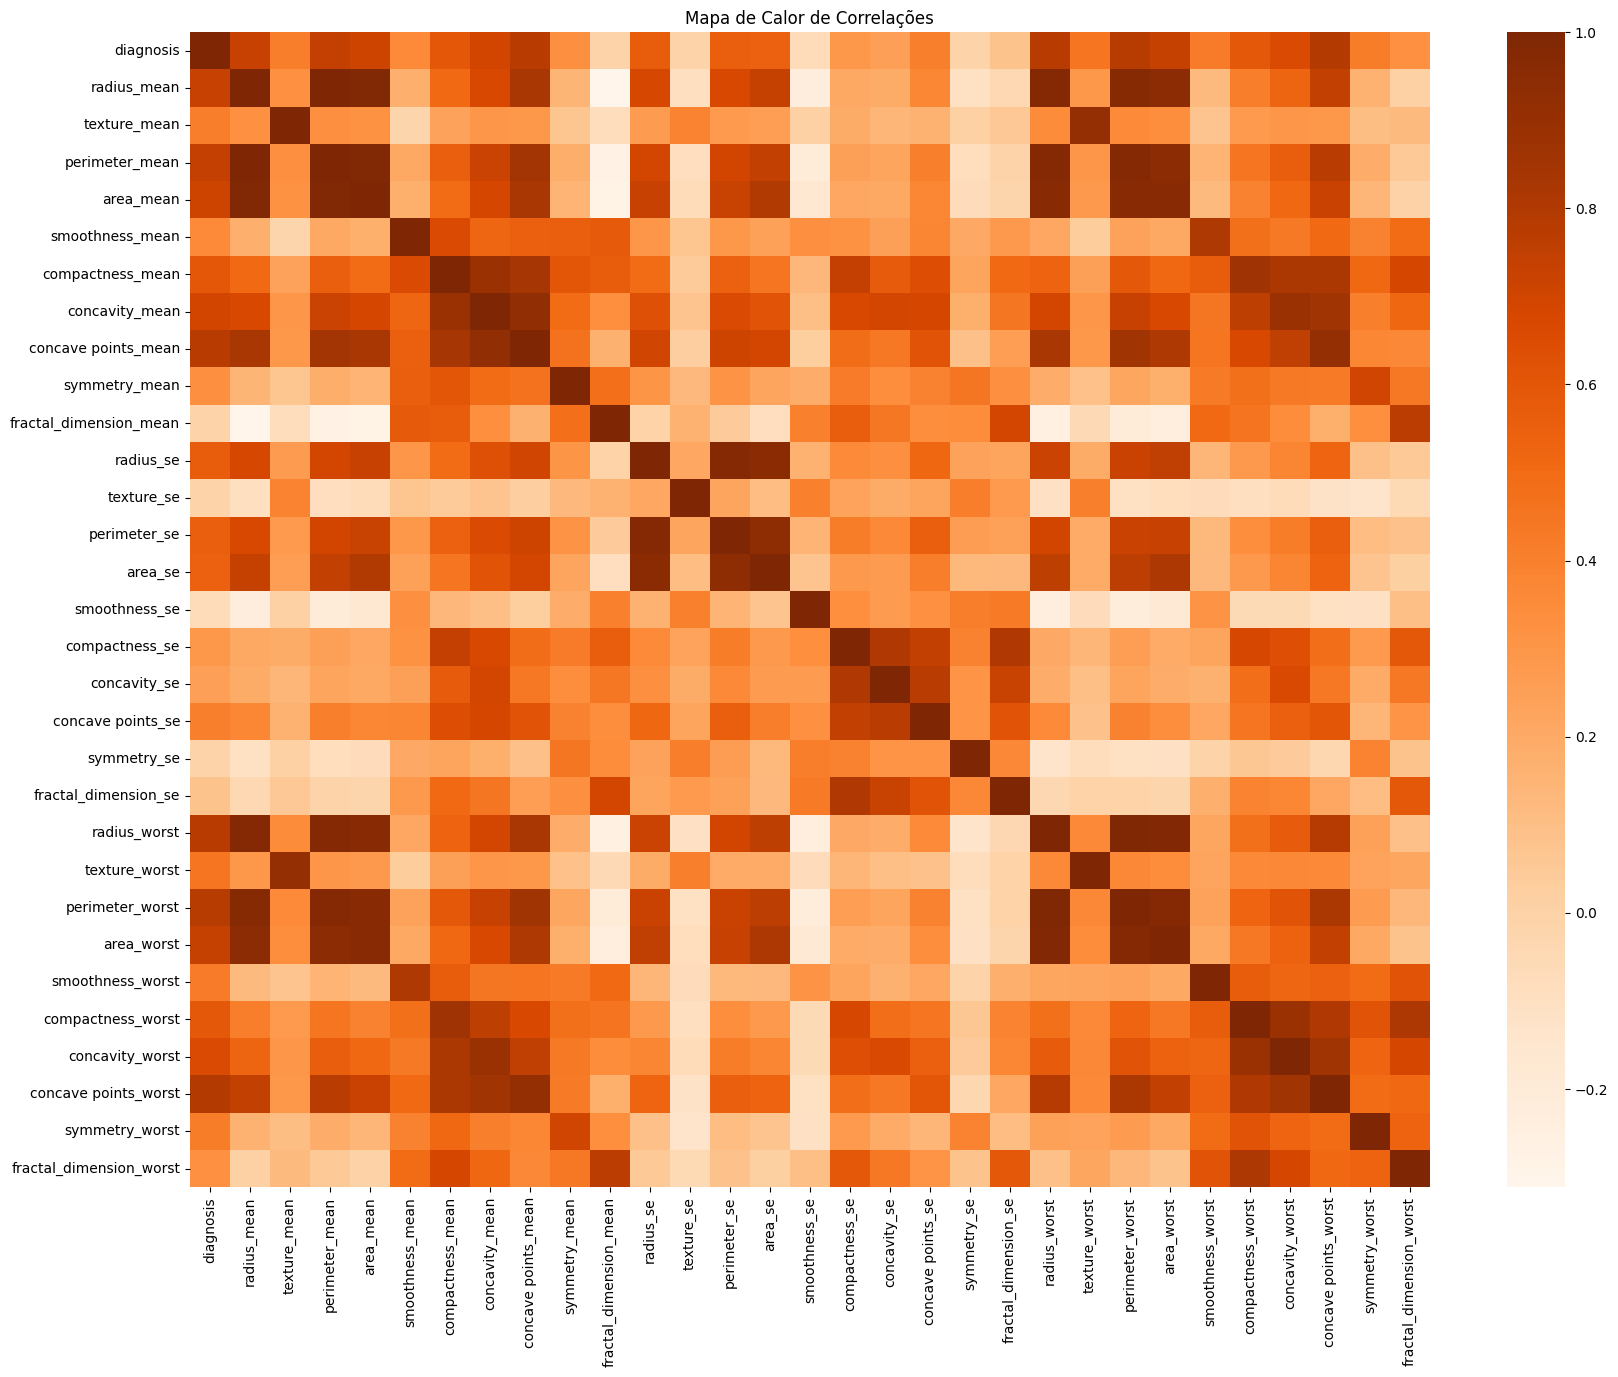

In [12]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr,cmap='Oranges')
plt.title('Mapa de Calor de Correlações')
plt.show()

A visualização mostra vários quadrados escuros, indicando que muitas variáveis estão correlacionadas entre si (ex: `radius_mean` e `perimeter_mean`). Isso é chamado de **multicolinearidade**.


<Axes: xlabel='radius_mean', ylabel='diagnosis'>

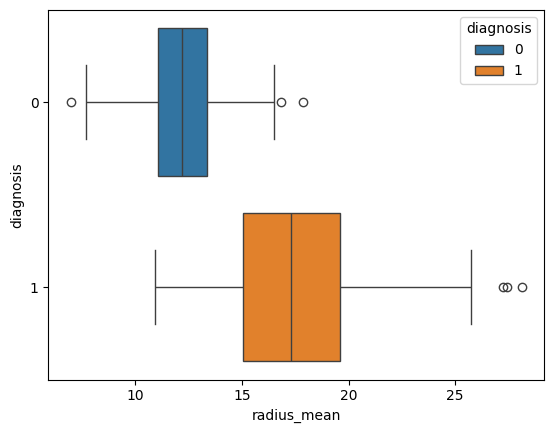

In [13]:
sns.boxplot(data=df,x='radius_mean',y='diagnosis',hue='diagnosis',orient='h')

### Passo 3: Pré-Processamento dos Dados para o Modelo

Agora que entendemos os dados, vamos prepará-los para alimentar nosso modelo de Regressão Logística.


#### 3.1 - Separando Features (X) e Target (y)
- **X**: Nossas variáveis preditoras (todas as colunas, exceto `diagnosis`),
- **y**: Nossa variável alvo (a coluna `diagnosis` que queremos prever).

In [14]:
X = df.drop(columns='diagnosis',axis=1)
y = df.diagnosis

#### 3.2 - Divisão em Dados de Treino e Teste

Esta é uma regra de ouro em Machine Learning! Nunca treinamos e avaliamos nosso modelo com os mesmos dados.
- **Dados de Treino**: Usados para ensinar o modelo a encontrar padrões
- **Dados de Teste**: Usados para avaliar o desempenho do modelo em dados que ele nunca viu antes.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### 3.3 - Normalização dos Dados (Feature Scaling)

Nossas variáveis estão em escalas muito diferentes (ex: `area_mean` é na casa das centenas, enquanto `smoothness_mean` é menor que 1). Isso pode atrapalhar o aprendizado do modelo.

Vamos usar o `StandardScaler` para colocar todas as variáveis na mesma escala (com média 0 e desvio padrão 1).

**Importante:** Ajustamos o normalizador (`.fit_transform`) **apenas** nos dados de treino. Depois, usamos esse mesmo ajuste para transformar (`.transform`) os dados de teste. Isso evita o \"vazamento de dados\" (data leakage) do conjunto de teste para o de treino.

In [17]:
# Normalizando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajustando e transformando os dados de TREINO
X_train_scaled = scaler.fit_transform(X_train)

# Apenas transformando os dados de TESTE com o ajuste feito no treino
X_test_scaled = scaler.transform(X_test)


### Passo 4: Construção e Treinamento do Modelo

Chegou a hora! Com os dados limpos e preparados, vamos criar nosso modelo de Regressão Logística e treiná-lo.


In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Treinando o modelo com os dados de treino normalizados
lr.fit(X_train_scaled,y_train)
print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linea

In [20]:
# Verificando os coeficientes para cada variavel independente
lr.coef_

array([[ 0.36619067,  0.36158121,  0.32048262,  0.41717824,  0.19220365,
        -0.62202349,  0.74767423,  1.1036456 , -0.22162459, -0.13947621,
         1.24418536, -0.15440679,  0.61111145,  0.86862326,  0.17719412,
        -0.60075293,  0.08321267,  0.46939674, -0.50545235, -0.69486112,
         0.81452982,  1.29113423,  0.5373691 ,  0.77404741,  0.49635091,
        -0.11840842,  0.97487392,  0.80805037,  1.20249734,  0.10324298]])

In [21]:
# Verificando o intercepto
lr.intercept_

array([-0.44421352])

### Passo 5: Avaliação do Desempenho do Modelo

Nosso modelo aprendeu os padrões. Agora, vamos ver o quão bem ele se sai ao prever os diagnósticos para os dados de teste, que ele nunca viu antes.

In [22]:
y_pred = lr.predict(X_test_scaled)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [27]:
y_test.head(10)

204    0
70     1
131    1
431    0
540    0
567    1
369    1
29     1
81     0
477    0
Name: diagnosis, dtype: int64

In [23]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

#### 5.1 - Matriz de Confusão

A Matriz de Confusão é uma ótima ferramenta para visualizar os acertos e erros do nosso modelo.

- **Verdadeiro Negativo (VN)**: Previu Benigno (0) e era Benigno (0). `[canto superior esquerdo]`
- **Falso Positivo (FP)**: Previu Maligno (1) e era Benigno (0). `[canto superior direito]`
- **Falso Negativo (FN)**: Previu Benigno (0) e era Maligno (1). `[canto inferior esquerdo]` - **Este é o erro mais perigoso!**
- **Verdadeiro Positivo (VP)**: Previu Maligno (1) e era Maligno (1). `[canto inferior direito]`"

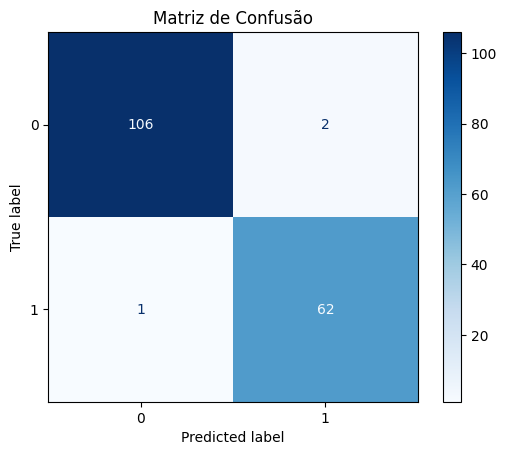

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

#### 5.2 - Relatório de Classificação

Este relatório nos dá métricas mais detalhadas sobre o desempenho:
- **Acurácia**: % de acertos totais.
- **Precisão**: De todas as vezes que o modelo previu \"Maligno\" quantas ele acertou?
- **Recall (Revocação)**: De todos os tumores que eram realmente \"Malignos\" quantos o modelo conseguiu identificar?
- **F1-Score**: Uma média harmônica entre precisão e recall."

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))

              precision    recall  f1-score   support

     Benigno       0.99      0.98      0.99       108
     Maligno       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



### Conclusão

Parabéns! Você construiu seu primeiro modelo de Regressão Logística do início ao fim.
,
Nosso modelo alcançou uma **acurácia de 98%**, o que é excelente! Mais importante, ele teve um bom **recall** para a classe \"Maligno\" (98%), o que significa que ele foi muito eficaz em identificar os casos realmente perigosos, errando apenas 3 vezes (Falsos Negativos).

Espero que este exercício tenha tornado o processo mais claro.